
The model is built on Google collaboratory, which runs on Linux Environment.

The root folder here is Google drive. This is because in Google Collaboratory although there are privelages of having a free GPU and TPU, the session whenever restarted causes the deletion of the files and folders. Hence using Google drive as the root folder is suggested.



Here we are going to start creating a program using Tensorflow Object detection(TFOD), which will see if a mask is present on the person's face or not.
since no webcam is present on my pc i will be using predefined images



Importing the Libraries

In [ ]:
#for handling the numerical operations
import numpy as np

#for handling the files locations
import os

#assigning unique id to the files
import uuid

#the neural network library
import tensorflow as tf

In [ ]:

!pip install opencv-contrib-python

In [ ]:
import cv2
import time

In [ ]:
IMAGES_PATH="/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/workspace/images/collected_images"

In [ ]:
'''

to be used when uploading files using webcam in real time

if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

'''
 
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

'''

to colleect images using webcam

for label in labels:

    #cap = cv2.VideoCapture("http://192.168.1.2:4747/shot.jpg")
    #address= "http://192.168.1.2:4747/video"
    #cap.open(address)

    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

'''

In [ ]:
labels= ["Mask", "No_Mask"]
number_imgs=5

In [ ]:
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

In [ ]:
!pip install --upgrade pyqt5 lxml

ADDING LABELS AND ANNOTATIONS

However I performed the action locally on the computer. A seperated enviroment is preferred and annotation is done with **Label Image**

In [ ]:
LABELIMG_PATH = os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'labelimg')
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [ ]:
if os.name == 'posix':
    !cd {LABELIMG_PATH} && make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

pyrcc5 -o libs/resources.py resources.qrc


In [ ]:
pwd

'/content'

In [ ]:
TRAIN_PATH = os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace', 'images', 'train')
TEST_PATH = os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace', 'images', 'test')
ARCHIVE_PATH = os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace', 'images', 'archive.tar.gz')

In [ ]:
if not os.path.exists(TRAIN_PATH):
    if os.name == 'posix':
        !mkdir -p {TRAIN_PATH}
    if os.name == 'nt':
         !mkdir {TRAIN_PATH}

if not os.path.exists(TEST_PATH):
    if os.name == 'posix':
        !mkdir -p {TEST_PATH}
    if os.name == 'nt':
         !mkdir {TEST_PATH}

if not os.path.exists(ARCHIVE_PATH):
    if os.name == 'posix':
        !mkdir -p {ARCHIVE_PATH}
    if os.name == 'nt':
         !mkdir {ARCHIVE_PATH}


Now we start training the model. We pick our models from **TensorFlow 2 Detection Model Zoo**, url= "https://github.com/sagar-das-crypto/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md", by using the Pretrained model URL, which can be found based of the model of choice

Here we use **SSD Mobilenet V2 FPNLite 320X320 Model**, trained on the COCO dataset. We can change the models as per our requirement based on the time in microseconds and coco MAP which is an accracy score

In [ ]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'#customizable
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'#customizable
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'#customizable
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace'),
    'SCRIPTS_PATH': os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/','scripts'),
    'APIMODEL_PATH': os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/','models'),
    'ANNOTATION_PATH': os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace','images'),
    'MODEL_PATH': os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/','protoc')
 }

In [ ]:
files = {
    'PIPELINE_CONFIG':os.path.join('/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
drive_path= "/content/drive/MyDrive/FaceMask_TFOD/Tensorflow/"

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

Download the models from TensorFlow 2 Detection Model Zoo and install tfod. https://www.tensorflow.org/install/source_windows

In [ ]:
if os.name=='nt':
    !pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Install **Tensorflow Object Detection**

In [ ]:
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd {drive_path}/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd {drive_path}/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd {drive_path}/models/research/slim && pip install -e .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Processing /content/drive/MyDrive/FaceMask_TFOD/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1664548 sha256=158ba95e860bc4abd2a57c2afad62907cda899a4f83b4878da4d60e4e5f67fce
  Stored in directory: /tmp/pip-ephem-wheel-cache-1my1jxsj/wheels/d7/5a/06/b2a53c80041ae0589a73555cc3c7fb0f0b6db74ab04416f79f
Succe


Verify Installation

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')

!python {VERIFICATION_SCRIPT}

2021-09-04 14:18:05.154034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-04 14:18:05.163147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-04 14:18:05.163840: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.7.11: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-09-04 14:18:05.173035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
#!pip uninstall protobuf matplotlib -y

In [ ]:
#!pip install protobuf matplotlib==3.2

In [ ]:

#this needs to be imported currently and not before
import object_detection

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-09-04 14:18:42--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.111.128, 2607:f8b0:4001:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.111.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2021-09-04 14:18:42 (197 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu


TFOD api installation complete

Next we create a **Label Map**

In [ ]:
labelss = [{'name':'Mask', 'id':1}, {'name':'No_Mask', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labelss:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [ ]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:

!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: /content/drive/MyDrive/FaceMask_TFOD/Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: /content/drive/MyDrive/FaceMask_TFOD/Tensorflow/workspace/annotations/test.record


In [ ]:
#copy models config to training folder

if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [ ]:
#changes made to the pipeline_config file

pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.total_steps=5000
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.num_steps=5000
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)


Training the Model

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [ ]:

!{command}

2021-09-04 14:18:54.749897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-04 14:18:54.759030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-04 14:18:54.759760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-04 14:18:54.761074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-04 14:18:54.761806: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S


Evaluate the Model

In [ ]:

command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
!command

Load Train Model From Checkpoint

In [ ]:

import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
#the ckpt-4 must be altered if better training is achieved when used from the checkpoint
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

For graphically checking the performance of our model in **Tensorboard**. Favourably works on Command Prompt


Detect from an Image

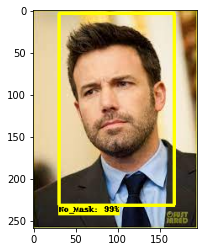

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


#uploading the files manually
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
IMAGE_PATH = "/content/drive/MyDrive/image/download5.jpg"
#os.path.join(paths['IMAGE_PATH'], 'test', 'Jerry Seinfeld_ I Don_t Regret Turning....jpg')
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
'''
#for webcam


cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break





'''



Freezing the Model

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:

!{command}



Conversion to TFJS

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
!{command}


After saving the tfjs file, the model is ready to be deployed.

However this is not the first time run of the model. The model we ran here is based on subsequent checkpoints achieved while the model was built. Hence the output of certain cells may not match to those who are running the model for the first time.

Also this model is trained such that, the files are overwritten in the Google Drive which is choosen as the root folder due to the session and file uploading issues in Google Collaboratory.
